Import the essential modules, including Matplotlib for charting, OpenCV for image processing, and Keras for building the deep learning model.

In [1]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, UpSampling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import cv2

Load the cifar dataset, which contains 32x32 color images that can be used to teach a computer how to recognize objects

In [2]:
(data_train, _), (data_test, _) = cifar10.load_data()

To help the model learn more successfully, normalize the pixel values to be between 0 and 1.

In [3]:
data_train = data_train.astype('float32') / 255.
data_test = data_test.astype('float32') / 255.

data_train = np.reshape(data_train, (len(data_train), 32, 32, 3))
data_test = np.reshape(data_test, (len(data_test), 32, 32, 3))

To produce low-resolution copies of the photographs, resize the original images to half their previous dimensions (16x16).

In [4]:
data_train_compressed = np.array([cv2.resize(image, (16, 16)) for image in data_train])
data_test_compressed = np.array([cv2.resize(image, (16, 16)) for image in data_test])

Set the autoencoder model parameters. The model has a convolutional layer, an upsampling layer that doubles the size of the image, another convolutional layer, and a final convolutional layer with a sigmoid activation function to produce the final upscaled image.

In [5]:
cnn = Sequential()
cnn.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(16, 16, 3)))
cnn.add(UpSampling2D((2, 2)))
cnn.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
cnn.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

Using the Adam optimizer and binary crossentropy as the loss function, compile the model.

In [6]:
cnn.compile(optimizer=Adam(), loss='mean_squared_error')

The autoencoder is trained using low-resolution images as inputs and high-resolution images as targets.

In [7]:
cnn.fit(data_train_compressed, data_train, epochs=10, batch_size=256, validation_data=(data_test_compressed, data_test))

Epoch 1/10
196/196 [==============================] - 325s 2s/step - loss: 0.0104 - val_loss: 0.0043
Epoch 2/10
196/196 [==============================] - 320s 2s/step - loss: 0.0034 - val_loss: 0.0032
Epoch 3/10
196/196 [==============================] - 320s 2s/step - loss: 0.0031 - val_loss: 0.0030
Epoch 4/10
196/196 [==============================] - 320s 2s/step - loss: 0.0029 - val_loss: 0.0028
Epoch 5/10
196/196 [==============================] - 320s 2s/step - loss: 0.0028 - val_loss: 0.0027
Epoch 6/10
196/196 [==============================] - 320s 2s/step - loss: 0.0027 - val_loss: 0.0027
Epoch 7/10
196/196 [==============================] - 323s 2s/step - loss: 0.0026 - val_loss: 0.0026
Epoch 8/10
196/196 [==============================] - 317s 2s/step - loss: 0.0026 - val_loss: 0.0025
Epoch 9/10
196/196 [==============================] - 320s 2s/step - loss: 0.0026 - val_loss: 0.0025
Epoch 10/10
196/196 [==============================] - 320s 2s/step - loss: 0.0025 - val_lo

Get a random image from the test set and add an extra dimension for the batch size.

In [23]:
id = np.random.randint(len(data_test_compressed))
test_image_compressed = data_test_compressed[id]
test_image_highres = data_test[id]
test_image_input = np.expand_dims(test_image_compressed, axis=0)

Use the model to upscale the image.

In [24]:
upscaled_img = cnn.predict(test_image_input)

1/1 [==============================] - 0s 21ms/step


Remove the extra batch size dimension.

In [25]:
upscaled_img = np.squeeze(upscaled_img, axis=0)
test_img_input = np.squeeze(test_image_input, axis=0)

Display the original low-resolution image, the upscaled image, and the original high-resolution image.

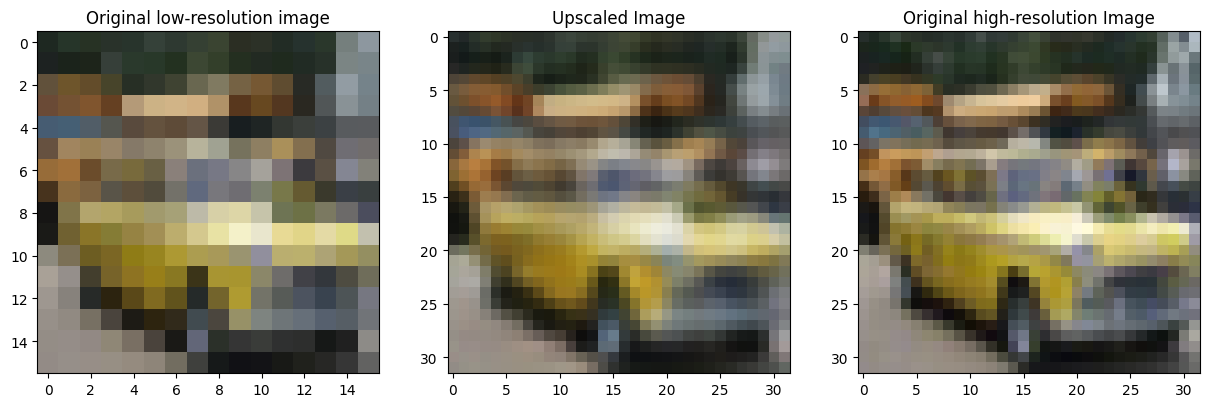

In [27]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(test_image_compressed)
ax[0].set_title("Original low-resolution image")
ax[1].imshow(upscaled_img)
ax[1].set_title("Upscaled Image")
ax[2].imshow(test_image_highres)
ax[2].set_title("Original high-resolution Image")
plt.show()